<h1>K - Nearest Neighbors</h1>

* KNN is a supervised machine learning algorithm that excels at classification and regression tasks.
* The KNN algorithm works based on the idea that similar things are closer to each other.
* Choose an odd value of k if the number of classses is even, apply the elbow method to select the value of and use Cross Validation
* Lazy Learning

<h2>How KNN works</h2>

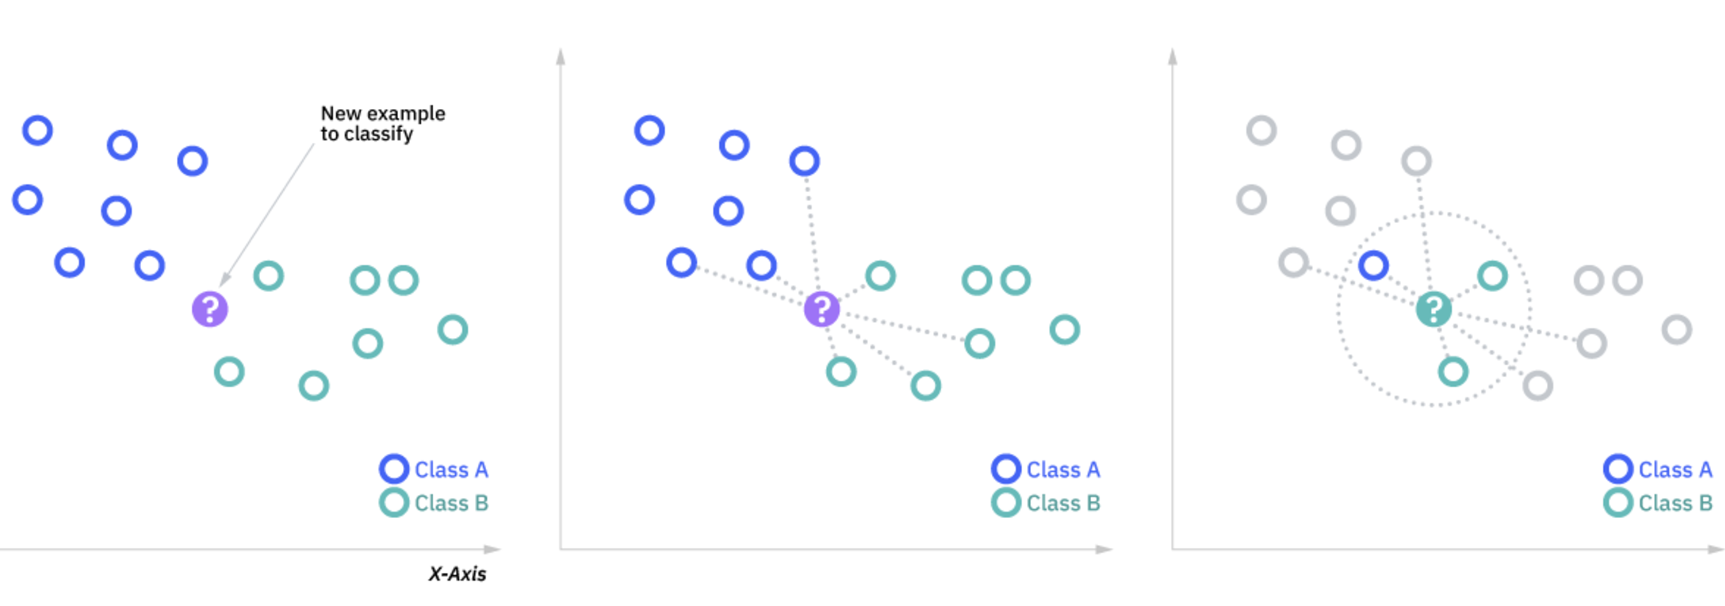

In [1]:
from urllib.request import urlretrieve
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
urlretrieve(url,'winequality-red.csv')

('winequality-red.csv', <http.client.HTTPMessage at 0x1d00f4436d0>)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
490,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6,6
986,9.8,0.340,0.39,1.4,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,7
345,7.0,0.685,0.00,1.9,0.067,40.0,63.0,0.99790,3.60,0.81,9.9,5
1027,6.4,0.795,0.00,2.2,0.065,28.0,52.0,0.99378,3.49,0.52,11.6,5
675,9.3,0.410,0.39,2.2,0.064,12.0,31.0,0.99840,3.26,0.65,10.2,5
1486,6.8,0.680,0.21,2.1,0.070,9.0,23.0,0.99546,3.38,0.60,10.3,5
1163,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0,5
1065,7.7,0.610,0.18,2.4,0.083,6.0,20.0,0.99630,3.29,0.60,10.2,6
636,9.6,0.880,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,5
282,7.6,0.520,0.12,3.0,0.067,12.0,53.0,0.99710,3.36,0.57,9.1,5


In [4]:
X = df.drop('quality', axis=1)
y = df['quality']

In [5]:
# Split Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [9]:
# Predict and evaluate
y_pred = knn.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 40.62%
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.41      0.98      0.57       130
           6       0.50      0.01      0.01       132
           7       0.50      0.02      0.05        42
           8       0.00      0.00      0.00         5

    accuracy                           0.41       320
   macro avg       0.23      0.17      0.11       320
weighted avg       0.44      0.41      0.25       320



c:\Users\user\anaconda3\envs\primeai\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\user\anaconda3\envs\primeai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\primeai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\primeai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and be

In [10]:
new_wine_samples = [
    [7.4, 0.70, 0.00, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4]
]

In [11]:
# Standardize the new wine samples
X_new_scaled = scaler.transform(new_wine_samples)

c:\Users\user\anaconda3\envs\primeai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
predictions = knn.predict(X_new_scaled)

# Predict the probability of each class
predictions_prob = knn.predict_proba(X_new_scaled)

print(f"Wine Sample: {new_wine_samples[0]}")
print(f"Predicted Quality: {predictions[0]}")
print(f"Prediction Probabilities: {predictions_prob[0]}")
print("\n")

Wine Sample: [7.4, 0.7, 0.0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4]
Predicted Quality: 5
Prediction Probabilities: [0. 0. 1. 0. 0. 0.]


